輸入立委臉書粉專內容及選舉政見資料

注意!jieba函式庫非內建需要額外下載:https://pypi.org/project/jieba/

In [2]:
import pandas as pd#引入環境內建函式庫pandas並簡寫其為pd
import jieba#引入斷詞函式庫jieba
from tqdm import tqdm#協助jieba進行斷詞迭代的文字重要性權重判斷的模組
fb = pd.read_csv('nysu_10902_2019立委_research.csv')#用函式panda從電腦端資料夾中讀入csv數據庫並命名
politics = pd.read_csv('9th_legislator_promise.csv')

以台東縣立委劉櫂豪為例，建立發文文字斷詞表

---



In [3]:
liu = fb[fb.page_name == "劉櫂豪"]#將有關劉櫂豪粉專的資料庫從fb數據庫內抓出
liu.head(1)#叫出劉櫂豪資料集中第一筆資料來看

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26691,213939351983587_2199719290072240,213939351983587,劉櫂豪,政治人物,籲司法調查普悠瑪違失 劉櫂豪要求政府記取教訓,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-01-15T08:30:49+0000,2019-01-15T16:30:49,...,20190111 籲司法調查普悠瑪違失 劉櫂豪盼政府記取教訓,NaN,456,0,0,0,0,0,25,7


In [4]:
liu[liu.created_time_taipei == max(liu.created_time_taipei)]#抓出發文時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
27631,213939351983587_2853758061335023,213939351983587,劉櫂豪,政治人物,明天是關鍵時刻，每一票都非常重要，請大家一定要去投票！\n櫂豪拜託大家，台東人要支持台東子弟...,NaN,video,https://www.facebook.com/213939351983587/posts...,2020-01-10T13:59:27+0000,2020-01-10T21:59:27,...,支持台東子弟,NaN,2106,0,0,0,0,0,50,13


In [5]:
liu[liu.created_time_taipei == min(liu.created_time_taipei)]#抓出發文時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
26706,213939351983587_2182584481785721,213939351983587,劉櫂豪,政治人物,今天有四位長輩對蔡總統發表公開信。然而，民進黨由誰代表出馬2020總統選舉，有黨內機制可決定...,NaN,photo,https://www.facebook.com/213939351983587/posts...,2019-01-03T05:20:39+0000,2019-01-03T13:20:39,...,蔡英文 Tsai Ing-wen,我知道有幾位老前輩寫信給我，不過這個時刻，向世界表達台灣人的心聲更重要。昨天我回應中國國家主...,871,0,0,0,0,0,40,12


In [6]:
liu['new_date'] = pd.to_datetime(liu['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
liu['month_year'] = pd.to_datetime(liu['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)
liu.head(1)

<ipython-input-6-ee12871822d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liu['new_date'] = pd.to_datetime(liu['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
<ipython-input-6-ee12871822d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liu['month_year'] = pd.to_datetime(liu['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
26691,213939351983587_2199719290072240,213939351983587,劉櫂豪,政治人物,籲司法調查普悠瑪違失 劉櫂豪要求政府記取教訓,NaN,link,https://www.facebook.com/213939351983587/posts...,2019-01-15T08:30:49+0000,2019-01-15T16:30:49,...,456,0,0,0,0,0,25,7,2019-01-15,2019-01


In [7]:
liu = liu.sort_values(by=['like_count'],ascending=0)#將資料以按讚數進行排列(ascending為0降序排)
liu

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
27228,213939351983587_2528136710563828,213939351983587,劉櫂豪,政治人物,那一年，我追的女孩😘\n\n櫂豪政大法律系的畢業典禮上🎓 子煊送花給我🌹 青春的我們戀愛❤️...,劉櫂豪──和劉櫂豪。,photo,https://www.facebook.com/213939351983587/posts...,2019-08-07T13:55:39+0000,2019-08-07T21:55:39,...,7614,0,0,0,0,0,360,28,2019-08-07,2019-08
27598,213939351983587_2770920476285449,213939351983587,劉櫂豪,政治人物,櫂豪挺銅板美食！\n冷冷的下午，跟著櫂豪一起來吃台東style的下午茶小吃~\n也告訴櫂豪，...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-05T07:30:00+0000,2019-12-05T15:30:00,...,5661,0,0,0,0,0,83,103,2019-12-05,2019-12
27621,213939351983587_2757887770922053,213939351983587,劉櫂豪,政治人物,櫂豪是客家女婿，謝謝子煊是我最好的客語老師。上任立委以來，櫂豪積極爭取客家學堂的建設經費，努...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-30T12:30:01+0000,2019-11-30T20:30:01,...,5426,0,0,0,0,0,92,68,2019-11-30,2019-11
27612,213939351983587_2763000857077411,213939351983587,劉櫂豪,政治人物,親愛的朋友，晚安，謝謝你💖\n\n今天櫂豪清早出門，參加南迴公路馬拉松，接著回到台東參加台東...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-01T15:44:04+0000,2019-12-01T23:44:04,...,5297,0,0,0,0,0,129,73,2019-12-01,2019-12
27552,213939351983587_2736778359699661,213939351983587,劉櫂豪,政治人物,早安！\n櫂豪前陣子來到好朋友魏紋書池上萬安的稻田一起割稻，挺台東青農！,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-20T23:12:00+0000,2019-11-21T07:12:00,...,4900,0,0,0,0,0,86,65,2019-11-21,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26715,213939351983587_2832105053500324,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:17+0000,2020-01-01T13:42:17,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01
26712,213939351983587_2831737200203776,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:15+0000,2020-01-01T10:24:15,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01
26710,213939351983587_2831738216870341,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:42+0000,2020-01-01T10:24:42,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01
26713,213939351983587_2832105353500294,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:27+0000,2020-01-01T13:42:27,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01


In [8]:
liu.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列(從0開始)
liu

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,27228,213939351983587_2528136710563828,213939351983587,劉櫂豪,政治人物,那一年，我追的女孩😘\n\n櫂豪政大法律系的畢業典禮上🎓 子煊送花給我🌹 青春的我們戀愛❤️...,劉櫂豪──和劉櫂豪。,photo,https://www.facebook.com/213939351983587/posts...,2019-08-07T13:55:39+0000,...,7614,0,0,0,0,0,360,28,2019-08-07,2019-08
1,27598,213939351983587_2770920476285449,213939351983587,劉櫂豪,政治人物,櫂豪挺銅板美食！\n冷冷的下午，跟著櫂豪一起來吃台東style的下午茶小吃~\n也告訴櫂豪，...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-05T07:30:00+0000,...,5661,0,0,0,0,0,83,103,2019-12-05,2019-12
2,27621,213939351983587_2757887770922053,213939351983587,劉櫂豪,政治人物,櫂豪是客家女婿，謝謝子煊是我最好的客語老師。上任立委以來，櫂豪積極爭取客家學堂的建設經費，努...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-30T12:30:01+0000,...,5426,0,0,0,0,0,92,68,2019-11-30,2019-11
3,27612,213939351983587_2763000857077411,213939351983587,劉櫂豪,政治人物,親愛的朋友，晚安，謝謝你💖\n\n今天櫂豪清早出門，參加南迴公路馬拉松，接著回到台東參加台東...,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-12-01T15:44:04+0000,...,5297,0,0,0,0,0,129,73,2019-12-01,2019-12
4,27552,213939351983587_2736778359699661,213939351983587,劉櫂豪,政治人物,早安！\n櫂豪前陣子來到好朋友魏紋書池上萬安的稻田一起割稻，挺台東青農！,NaN,video,https://www.facebook.com/213939351983587/posts...,2019-11-20T23:12:00+0000,...,4900,0,0,0,0,0,86,65,2019-11-21,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,26715,213939351983587_2832105053500324,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:17+0000,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01
995,26712,213939351983587_2831737200203776,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:15+0000,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01
996,26710,213939351983587_2831738216870341,213939351983587,劉櫂豪,政治人物,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,劉櫂豪──在成功鎮。,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T02:24:42+0000,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01
997,26713,213939351983587_2832105353500294,213939351983587,劉櫂豪,政治人物,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,NaN,photo,https://www.facebook.com/ChaoHaoLiu/photos/a.2...,2020-01-01T05:42:27+0000,...,8,0,0,0,0,0,0,0,2020-01-01,2020-01


結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [9]:
doc_names = range(len(liu)) #len(liu):看劉櫂豪有幾篇文章
doc_names

range(0, 999)

In [10]:
import numpy as np #引入向量矩陣運算函式庫numpy
liu = liu.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(liu['message'])#list(liu['message']): 把要斷詞的內容轉成 list 格式(有順序性的格式)
liu_docs = pd.DataFrame(columns=['jieba_results'])#創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
liu_docs['jieba_results'] = liu_docs['jieba_results'].astype('str')#原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

ieba 斷詞模組最著名的功能就是提供斷詞模式，主要分為
1精確模式:將句子最精確的切開，適合文本分析
2全模式:把句子中所有的可以成詞的詞語都斷出来，速度非常快。
3搜索引擎模式:在精確模式的基礎上，對長的詞語再次切分，提高召回率，適合用於搜索引擎分詞。

操作方式：
透過 jieba.cut () 來進行斷詞，cut_all 參數為 True 的話為全模式，預設為 False，也就是精確模式
jibea.cut_for_search () 是搜索引擎模式
cut ()、cur_for_search () 返回的結構都是一个可迭代的 generator，因此使用 for 迴圈來取得每個斷詞。
也可以使用 lcut ()，意思跟 cut () 是一樣的，只是返回的型態變成 list，方便使用。

In [19]:
words = jieba.lcut(text_list[0], cut_all =False)#精確模式斷詞
print(words)

['那', '一年', '，', '我', '追', '的', '女孩', '😘', '\n', '\n', '櫂豪', '政', '大', '法律系', '的', '畢業', '典禮', '上', '🎓', ' ', '子煊', '送花', '給我', '🌹', ' ', '青春', '的', '我們', '戀愛', '❤', '️', '\n', '\n', '今天', '七夕', '情人', '節', '，', '你', '有', '收到', '我', '和', '子煊', '的', '青春', '照', '嗎', '？', '如果', '沒有', '，', '趕快', '加', '我', '的', 'line', '哦', '😄', '\n', '\n', '劉櫂豪', ' ', 'Line', ' ', '&', ' ', 'IG', '\n', 'Line', '：', ' ', 'https', ':', '/', '/', 'tinyurl', '.', 'com', '/', 'y59pyy2e', '\n', 'Line', ' ', 'ID', ' ', '帳號', '：', '@', 'pss4210h', '\n', 'IG', '：', 'ahao', '_', 'liu']


In [18]:
words = jieba.lcut(text_list[0], cut_all =True)#全模式斷詞
print(words)

['那一年', '一年', '，', '我', '追', '的', '女孩', '😘', '\n', '', '\n', '', '櫂豪', '政大', '大法', '法律', '法律系', '的', '畢', '業', '典', '禮', '上', '🎓', ' ', '', '子煊', '送花', '給', '我', '🌹', ' ', '', '青春', '的', '我', '們', '戀', '愛', '❤️', '\n', '', '\n', '', '今天', '七夕', '情人', '節', '，', '你', '有', '收到', '我', '和', '子煊', '的', '青春', '照', '嗎', '？', '如果', '沒', '有', '，', '趕', '快', '加', '我', '的', 'line', '哦', '😄', '\n', '', '\n', '', '劉櫂豪', '櫂豪', '', ' ', '', 'Line', '', ' ', '', '&', '', ' ', '', 'IG', '', '\n', '', 'Line', '：', ' ', '', 'https', '://', 'tinyurl', '.', 'com', '/', 'y59pyy2e', '', '\n', '', 'Line', '', ' ', '', 'ID', '', ' ', '', '帳', '號', '：@', 'pss4210h', '', '\n', '', 'IG', '：', 'ahao', '_', 'liu']


In [17]:
words = jieba.lcut(text_list[998], cut_all = False)
print(words)

['返鄉貼紙', '熱門叫座', ' ', '歡迎索取', ' ', '劉櫂豪', '元旦', '升旗典禮', '呼籲', '青年', '返鄉投票', '\n', '\n', '劉櫂豪', '立委', '服務處', '近日', '來', '了許', '多年', '輕人', '、', '外縣', '市', '的', '朋友', '或者', '不', '熟悉', '的', '鄉親', '特地', '專程', '來', '索取', '「', '返鄉投票', '」', '貼紙', '，', '由', '於', '民進', '黨', '青年', '部針', '對', '大', '返鄉', '計畫', '，', '推出', '10', '款活', '潑', '又', '有', '創意', '的', '返鄉貼紙', '，', '大受', '青年', '好評', '，', '而', '劉櫂豪', '服務處', '因為', '青年', '部', '全力', '相挺', '，', '10', '款', '貼紙', '一次', '到位', '，', '全台僅', '有', '，', '許', '多年', '輕人', '或是', '委', '託', '父母', '朋友', '特地', '來', '索取', '，', '讓', '劉櫂豪', '服務處', '增添', '了', '許多', '人氣', '，', '也', '感受', '到', '台東', '子弟', '返鄉投票', '的', '意願', '。', '\n', '\n', '今天', '是', '2020', '年', '的', '元旦', '，', '新', '的', '一年', '許多人', '都', '有', '新', '的', '展望', '，', '劉櫂豪', '委員', '早上', '七點', '特地', '前往', '鐵花村', '參加縣', '政府', '舉辦', '的', '升旗典禮', '，', '祈福', '新', '的', '一年', '台灣', '能夠', '守護', '民主', '的', '價值', '，', '台東', '的', '發展', '能夠', '一年', '比', '一年', '好', '，', '隨後', '劉櫂豪', '立即', '前往', '東海岸', '，', '來', '到', 

把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [14]:
import jieba#引入斷詞模組jieba
from tqdm import tqdm#進度條模組,可輔助觀看迴圈執行進度
import re#引入正規運算式模組re
jieba.load_userdict("dict.txt")#引入一個使用者定義詞庫(放在老師給的資料夾中)使jieba斷詞結果更精確

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""#清除斷詞中無意義的符號字詞
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    liu_docs = liu_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [15]:
liu_docs

,jieba_results
0,那 一年 我 追 的 女孩 😘 櫂豪 政 大 法律系 的 畢業 典禮 上 🎓 子煊 送...
1,櫂豪 挺 銅板美食 冷冷的 下午 跟 著 櫂豪 一起 來 吃 台東 的 下午茶 小吃 ~...
2,櫂豪 是 客家 女婿 謝謝 子煊 是 我 最好 的 客語 老師 。 上任 立委 以來 櫂豪...
3,親愛的 朋友 晚安 謝謝 你 💖 今天 櫂豪 清早 出門 參加 南迴公路 馬拉松 接著 回...
4,早安 櫂豪 前陣子 來 到 好 朋友 魏紋書 池上 萬安 的 稻田 一起 割稻 挺台 東青農 ！
...,...
994,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...
995,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...
996,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...
997,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...


In [20]:
liu['jieba_results'] = liu_docs
liu_post = liu[['new_date','message','jieba_results','like_count']]
liu_post

,new_date,message,jieba_results,like_count
0,2019-08-07,那一年，我追的女孩😘\n\n櫂豪政大法律系的畢業典禮上🎓 子煊送花給我🌹 青春的我們戀愛❤️...,那 一年 我 追 的 女孩 😘 櫂豪 政 大 法律系 的 畢業 典禮 上 🎓 子煊 送...,7614
1,2019-12-05,櫂豪挺銅板美食！\n冷冷的下午，跟著櫂豪一起來吃台東style的下午茶小吃~\n也告訴櫂豪，...,櫂豪 挺 銅板美食 冷冷的 下午 跟 著 櫂豪 一起 來 吃 台東 的 下午茶 小吃 ~...,5661
2,2019-11-30,櫂豪是客家女婿，謝謝子煊是我最好的客語老師。上任立委以來，櫂豪積極爭取客家學堂的建設經費，努...,櫂豪 是 客家 女婿 謝謝 子煊 是 我 最好 的 客語 老師 。 上任 立委 以來 櫂豪...,5426
3,2019-12-01,親愛的朋友，晚安，謝謝你💖\n\n今天櫂豪清早出門，參加南迴公路馬拉松，接著回到台東參加台東...,親愛的 朋友 晚安 謝謝 你 💖 今天 櫂豪 清早 出門 參加 南迴公路 馬拉松 接著 回...,5297
4,2019-11-21,早安！\n櫂豪前陣子來到好朋友魏紋書池上萬安的稻田一起割稻，挺台東青農！,早安 櫂豪 前陣子 來 到 好 朋友 魏紋書 池上 萬安 的 稻田 一起 割稻 挺台 東青農 ！,4900
...,...,...,...,...
994,2020-01-01,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...,8
995,2020-01-01,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...,8
996,2020-01-01,早安，成功。新年快樂2020！\n\n透早參加縣府升旗典禮，會後立即往東海岸去，我在成功菜市...,早安 成功 。 新年 快樂 透早 參加 縣府 升旗典禮 會 後 立即 往 東海岸 去 我...,8
997,2020-01-01,返鄉貼紙熱門叫座 歡迎索取 劉櫂豪元旦升旗典禮呼籲青年返鄉投票\n\n劉櫂豪立委服務處近日來...,返鄉貼紙 熱門叫座 歡迎索取 劉櫂豪 元旦 升旗典禮 呼籲 青年 返鄉投票 劉櫂豪...,8


NameError: name 'plt' is not defined

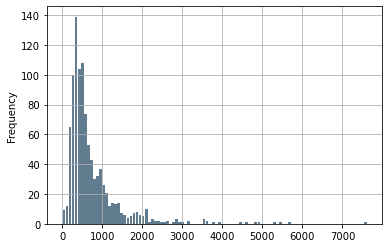

In [21]:
commutes = liu_post['like_count']#看看每篇貼文按讚數分布狀況(以此找出有指標性的文章)
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [23]:
temp = liu_post[(liu_post['like_count'] <= 1000) & (liu_post['like_count'] > 500)]#按假設狀況挑出想分析的貼文(1000>貼文讚數>500)
temp

,new_date,message,jieba_results,like_count
192,2019-08-20,劉櫂豪督促南迴公路拓寬工程 提早通車打通台東經濟命脈\n\n經過劉櫂豪立委任內一再督促及多次...,劉櫂豪 督促 南迴公路 拓寬工程 提早 通車 打通 台東 經濟命脈 經過 劉櫂豪 立 ...,997
193,2019-10-25,【🎥直播LIVE】\n為了要謝謝大家的踴躍支持，讓櫂豪的「來去台東」清唱榮獲歌唱比賽第三名\...,🎥 直播 為 了 要 謝謝 大家 的 踴躍 支持 讓 櫂豪 的 來去台東 清唱 榮獲 歌...,992
194,2019-08-05,劉櫂豪邀請蔡英文總統太麻里釋迦園農業座談\n\n上週末（3日）蔡英文總統來到台東，在劉櫂豪立...,劉櫂豪 邀請 蔡英文 總統 太麻里 釋迦園 農業座談 上 週末 日 蔡英文 總統 來 到...,991
195,2019-07-10,"🚃劉櫂豪爭取3,000萬元 興建南迴各車站電梯無障礙設施\n\n🛤過去在南迴線火車站，行動不...","🚃 劉櫂豪 爭取 , 萬元 興建 南迴 各 車站 電梯 無障礙 設施 🛤 過去 在...",988
196,2019-01-10,劉櫂豪：兩岸議題將成為2020台灣總統選戰主軸,劉櫂豪 兩岸 議題 將成 為 台灣 總統 選戰主軸,987
...,...,...,...,...
508,2019-06-14,"劉櫂豪爭取3,240萬元建設南迴線各車站無障礙設施 \n今年2月起陸續完工啟用","劉櫂豪 爭取 , 萬元 建設 南迴線 各 車站 無障礙 設施 今年 月 起 ...",502
509,2019-07-12,劉櫂豪也有line貼圖了！歡迎大家下載「好豪愛我」貼圖，跟櫂豪一起說你好你好\n\n下載網址...,劉櫂豪 也 有 貼圖 了 歡迎 大家 下載 好 豪愛我 貼圖 跟 櫂豪 一起 說 你好 ...,501
510,2019-07-11,劉櫂豪爭取綠島生活圈道路經費補助4.09億元,劉櫂豪 爭取 綠島 生活圈 道路 經費 補助 . 億元,501
511,2019-08-04,大客車駕駛擴大徵才就業安薪方案招募活動\n\n#劉櫂豪爭取新增台東場次\n#我付費你學車駕駛...,大客車 駕駛 擴大徵才 就 業安薪 方案 招募 活動 # 劉櫂豪 爭取 新增 台東場 次 ...,501


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [24]:
corpus = temp['jieba_results'].values.tolist()

In [25]:
# 使用TF-IDF演算法來判斷文章重要性與否
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [26]:
#使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['計畫', '辦理', '萬元', '協助', '道路', '補助', '台東', '改善', '爭取', '劉櫂豪']
TOP 10 WORDS PER TOPIC #1
['活動', '大家', '運動', '一起', '協和米', '直播', '朋友', '劉櫂豪', '您好', '台東']
TOP 10 WORDS PER TOPIC #2
['正視', '問題', '忙碌', '謝謝', '下午茶', '權益', '辛苦', '劉櫂豪', '大家', '朋友']
TOP 10 WORDS PER TOPIC #3
['月台', '承租', '督促', '啟用', '拓寬工程', '朋友', '母親節', '成功鎮', '大家', '台東']
TOP 10 WORDS PER TOPIC #4
['市場', '海草', '祝福', '日本', '自己', '今天', '鹿野', '台東', '大家', '客家']
TOP 10 WORDS PER TOPIC #5
['鐵人', '提醒', '櫂豪', '一位', '同心', '早安', '子煊', '祝福', '地址', '大家']
TOP 10 WORDS PER TOPIC #6
['美好', '早餐', '開心', '一天', '一位', '假日', '朋友', '大家', '愉快', '早安']
TOP 10 WORDS PER TOPIC #7
['謝謝', '小英總統', '今天', '劉櫂豪', '台東', '晚上', '邀請', '棒球', '大家', '櫂豪']


In [23]:
LDA.fit(X)#在不用TF-IDF塞選法下顯現的關鍵詞不同

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['辦理', '萬元', '政府', '爭取', '設施', '農委會', '改善', '大家', '台東', '劉櫂豪']
TOP 10 WORDS PER TOPIC #1
['發展', '南迴公路', '協助', '爭取', '計畫', '觀光', '辦理', '改善', '台東', '劉櫂豪']
TOP 10 WORDS PER TOPIC #2
['客家', '補助', '萬元', '池上', '台東', '計畫', '爭取', '改善', '道路', '劉櫂豪']
TOP 10 WORDS PER TOPIC #3
['活動', '邀請', '謝謝', '早安', '劉櫂豪', '朋友', '櫂豪', '客家', '台東', '大家']
TOP 10 WORDS PER TOPIC #4
['文化部', '台東縣', '補助', '大家', '爭取', '歷史', '萬元', '台東', '劉櫂豪', '咖啡']
TOP 10 WORDS PER TOPIC #5
['大家', '櫂豪', '人潮', '台灣', '美景', '椰子', '阿丁', '大哥', '行程', '棒球']
TOP 10 WORDS PER TOPIC #6
['增加', '池上', '地區', '爭取', '收益', '活動', '農民', '農會', '劉櫂豪', '太麻里']
TOP 10 WORDS PER TOPIC #7
['農業', '農機', '鐵條', '農委會', '設施', '台東', '農民', '農糧署', '劉櫂豪', '補助']


In [27]:
politics_liu = politics[politics.姓名 == "劉櫂豪"].政見.to_string()
politics_liu = re.sub(re_punctuation, "", politics_liu)
politics_liu = re.sub(r'[0-9]','',politics_liu)
politics_liu = re.sub(r'[a-zA-Z]','',politics_liu)
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_liu, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '一', '、', '持續', '配合', '縣', '政府', '、', '議會', '、', '鄉鎮', '市公所', '、', '代表', '會', '向', '中央', '爭取', '年度', '施政', '計畫', '預算', '補助', '。', '二', '、', '問政', '、', '選民服', '...']


In [28]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['政府', '市公所', '持續', '施政', '鄉鎮', '代表', '配合', '補助', '選民服', '年度']
TOP 10 WORDS PER TOPIC #1
['中央', '政府', '市公所', '持續', '鄉鎮', '施政', '選民服', '補助', '配合', '代表']
TOP 10 WORDS PER TOPIC #2
['市公所', '政府', '持續', '鄉鎮', '施政', '代表', '配合', '補助', '選民服', '爭取']
TOP 10 WORDS PER TOPIC #3
['市公所', '施政', '持續', '鄉鎮', '代表', '配合', '補助', '選民服', '議會', '預算']
TOP 10 WORDS PER TOPIC #4
['中央', '政府', '持續', '施政', '鄉鎮', '市公所', '代表', '配合', '補助', '選民服']
TOP 10 WORDS PER TOPIC #5
['中央', '市公所', '施政', '代表', '配合', '補助', '選民服', '鄉鎮', '持續', '政府']
TOP 10 WORDS PER TOPIC #6
['政府', '持續', '鄉鎮', '代表', '補助', '配合', '選民服', '施政', '市公所', '中央']
TOP 10 WORDS PER TOPIC #7
['市公所', '鄉鎮', '施政', '持續', '代表', '配合', '補助', '選民服', '計畫', '問政']
